In [1]:

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots, savefig
import richardsplot as rplot

from utilities.analysis import pixellc, plotting
from utilities.ccd import CCD
from utilities.containers import *
from utilities.conversions import magToFlux,fluxToMag

/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/astropy/table/np_utils.py:19: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import _np_utils
/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/astropy/io/ascii/fastbasic.py:9: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  from . import cparser
/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
cmap = rplot.palettable.colorbrewer.diverging.PuOr_11.mpl_colormap

# an HDF5 File with all the pixel data from the campaign is needed
contact jmoreno3663@gmail.com for the files

In [3]:
pixmapfile = "/media/jackeline/UUI/PixelMaps/K2_target_pixels.hdf5"

In [4]:
def create_pixel_map(gen,lc):
    
    ccd = gen.ccd

    #Make the Full Image Map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Median Pixel Light Curves",
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)
    
    #Make the differenced image map
    fig, ax = subplots(1,1, figsize=(16,9))
    im = plotting.plot_pixel_lc(ax, lc[:,:,2], smooth=120, image=True,
                          differenced=True, aspect='auto', cmap=cmap, vmin=-1, vmax=1)
    plotting.format_pixel_image(ax, im, lc.shape[0])
    ax.set_title("Differenced Median Pixel Light Curves",
                fontsize=30)
    ax.plot(0, 0, "-", label="M{}.{}".format(ccd.module, ccd.channel+1))    
    ax.legend(fontsize = 50, frameon=False, loc = 8, handlelength=0, handletextpad=0,)


## Single Chanel K2 Intensity Map of Systematics 

In [5]:
ccd = CCD(module=11, channel=3, field='FLUX', campaign=8)
            
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)
print "Making", ccd

    
ccd = gen.ccd
flux_range = map(magToFlux,(50,1))
percentiles = np.linspace(0, 100, 300)

lc = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)


Making CCD(module=11, channel=3, field='FLUX', campaign=8)


/home/jackeline/anaconda3/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:1328: UserWarning: findfont: Font family [u'serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


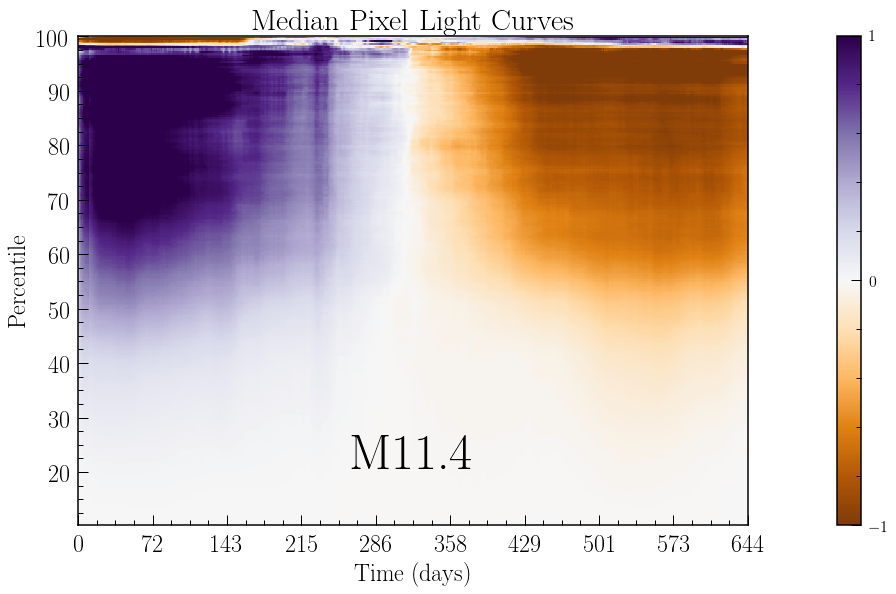

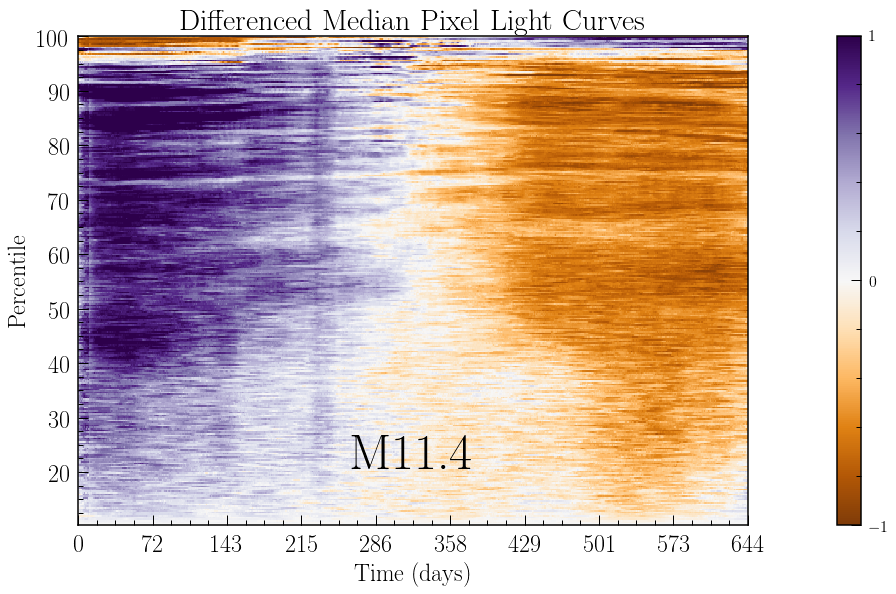

In [8]:
create_pixel_map(gen,lc)

# Flux binned lightcurves

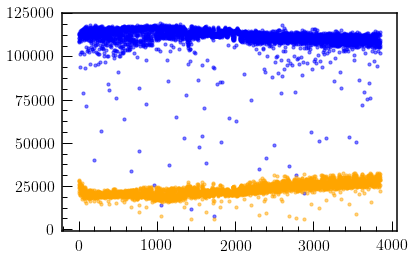

In [9]:
plt.scatter(xrange(len(lc[:,-1,2])),lc[:,-1,2]-lc[:,-2,2],s = 10,color = "blue", alpha = 0.5)
plt.scatter(xrange(len(lc[:,-2,2])),lc[:,-2,2]-lc[:,-3,2],s = 10,color = "orange", alpha = 0.5)

# Smoothing and whitening

In [10]:
from utilities.analysis import plot_template

#look at three examples of smoothing windows
temp1 = plot_template.smooth_template(lc[:,:,2], smooth=150, image=True,differenced=False)
temp2 = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=False)
temp3 = plot_template.smooth_template(lc[:,:,2], smooth=1000, image=True,differenced=False)

### Test multiple Smoothing WIndows

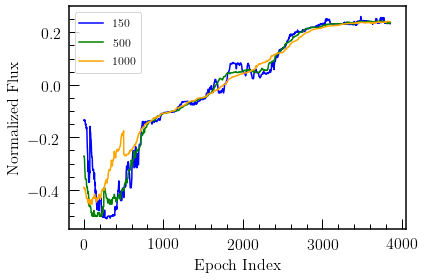

In [11]:
plt.plot(xrange(len(temp1[:,-1])),temp1[:,-1], color = "blue", label = "150")
plt.plot(xrange(len(temp2[:,-1])),temp2[:,-1], color =  "green", label = "500")
plt.plot(xrange(len(temp3[:,-1])),temp3[:,-1], color = "orange", label = "1000")
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()
#plt.savefig('./plots/templateTest.png', dpi = 200)


In [12]:
flux_med_bin_edges = np.nanmedian(lc[:,:,2], axis=0)
mag_med_bin_edges = fluxToMag(flux_med_bin_edges)
len(flux_med_bin_edges)

299

In [13]:
temp2_med = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=False)
temp2_diff = plot_template.smooth_template(lc[:,:,2], smooth=500, image=True,differenced=True)

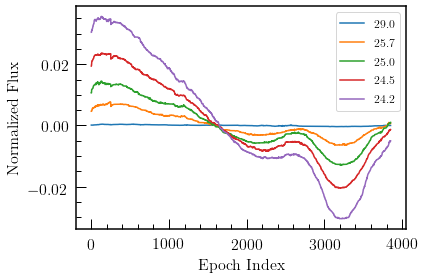

In [14]:
for i in range(0,50, 10):
    plt.plot(xrange(len(temp2_med[:,i])),temp2_med[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

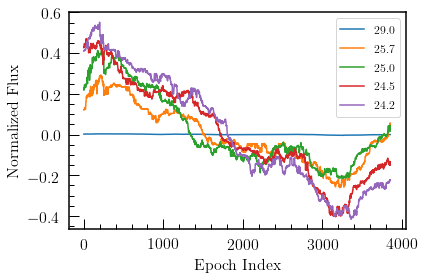

In [16]:
for i in range(0,50,10):
    plt.plot(xrange(len(temp2_diff[:,i])),temp2_diff[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

# Testing another channel

In [17]:
ccd = CCD(module=11, channel=2, field='FLUX', campaign=8)
            
cont = PixelMapContainer.from_hdf5(pixmapfile, ccd)
gen = PixMapGenerator(cont)
print "Making", ccd

    
ccd = gen.ccd
flux_range = map(magToFlux,(50,1))
percentiles = np.linspace(0, 100, 300)

lc2 = pixellc.get_pixel_lc(gen, percentiles, flux_range=flux_range)

Making CCD(module=11, channel=2, field='FLUX', campaign=8)


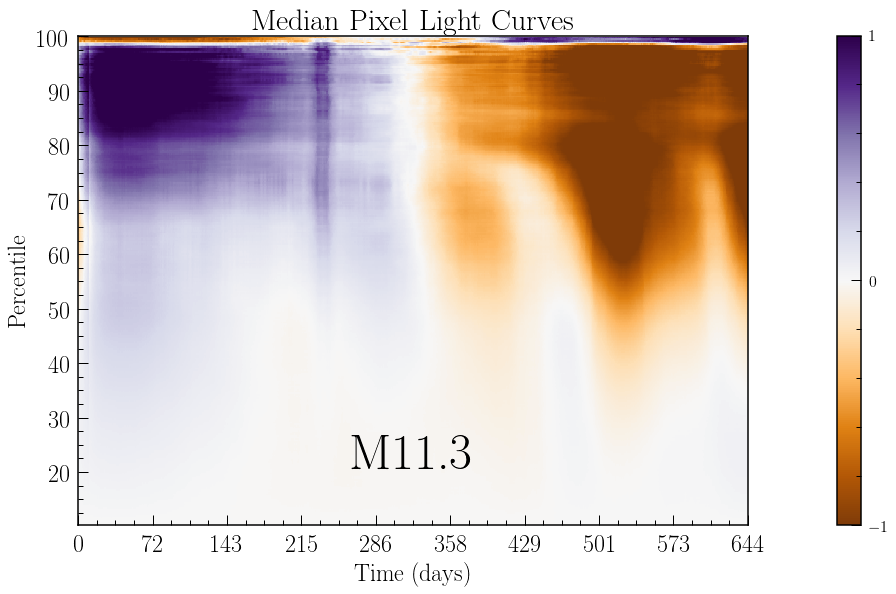

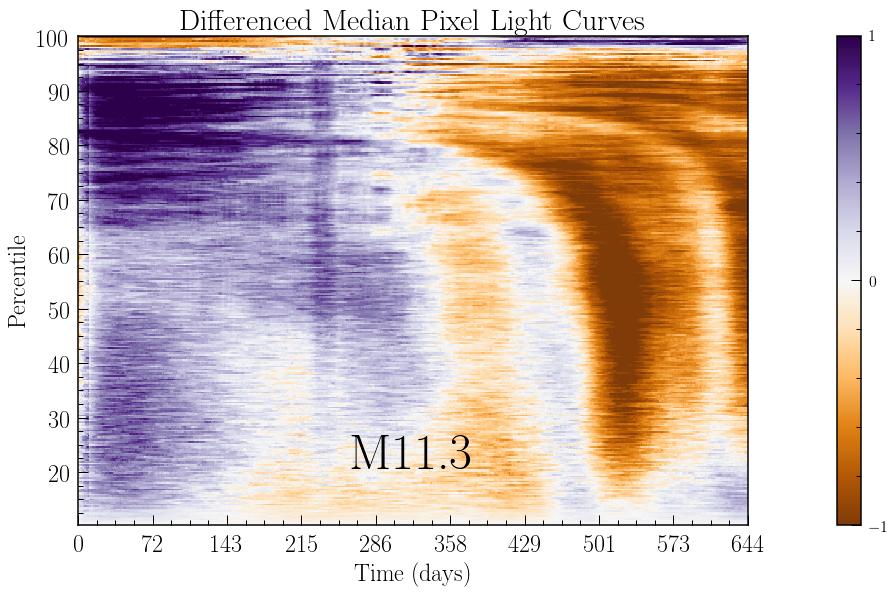

In [18]:
create_pixel_map(gen,lc2)

In [19]:
flux_med_bin_edges = np.nanmedian(lc2[:,:,2], axis=0)
mag_med_bin_edges = fluxToMag(flux_med_bin_edges)

In [20]:
temp_med = plot_template.smooth_template(lc2[:,:,2], smooth=500, image=True,differenced=False)
temp_diff = plot_template.smooth_template(lc2[:,:,2], smooth=500, image=True,differenced=True)

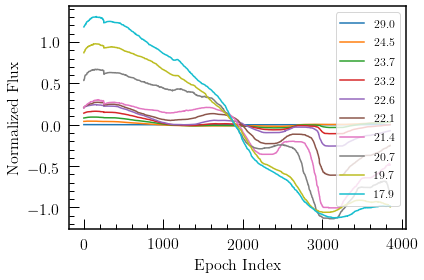

In [32]:
for i in range(0,len(mag_med_bin_edges),30):
    plt.plot(xrange(len(temp_med[:,i])),temp_med[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()

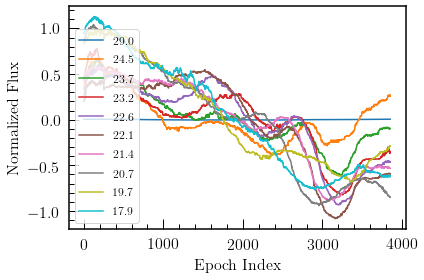

In [31]:
for i in range(0,299,30):
    plt.plot(xrange(len(temp_diff[:,i])),temp_diff[:,i], 
             label = "{:3.1f}".format(mag_med_bin_edges[i]))
plt.xlabel("Epoch Index")
plt.ylabel("Normalized Flux")
plt.legend()
plt.tight_layout()